In [1]:
#Chaos in 1-Dimensional AutoEncoders via Sharkovsky

In [2]:
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random as rn

np.random.seed(42)
rn.seed(12345)
tf.random.set_seed(1234)

# import pandas as pd
# import seaborn as sns
# import warnings

from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.datasets import mnist
from keras.callbacks import Callback

Using TensorFlow backend.


In [3]:
#Hyperparameters
input_size = 1
#Number of nodes per hidden layer
hidden_size = 5
#Number of nodes in the middle layer. Smaller size results in more compression.
#code_size = 10

In [4]:
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(hidden_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

In [5]:
#input_img = Input(shape=(input_size,))
# hidden_1 = Dense(hidden_size, activation='relu')(input_img)
# hidden_2 = Dense(hidden_size, activation='relu')(hidden_1)
# hidden_3 = Dense(hidden_size, activation='relu')(hidden_2)
# hidden_4 = Dense(hidden_size, activation='relu')(hidden_3)
# hidden_5 = Dense(hidden_size, activation='relu')(hidden_4)
# hidden_6 = Dense(hidden_size, activation='relu')(hidden_5)
# hidden_7 = Dense(hidden_size, activation='relu')(hidden_6)
# hidden_8 = Dense(hidden_size, activation='relu')(hidden_7)
# hidden_9 = Dense(hidden_size, activation='relu')(hidden_8)
# hidden_10 = Dense(hidden_size, activation='relu')(hidden_9)
# hidden_11 = Dense(hidden_size, activation='relu')(hidden_10)
# output_img = Dense(input_size, activation='sigmoid')(hidden_11)

In [6]:
#Training set of only periodic points
p = np.array([[.1], [.4], [.7]])
fp = np.array([[.7], [.1], [.4]])

In [7]:
a = np.random.rand(0,1)
a

array([], shape=(0, 1), dtype=float64)

In [8]:
#Training set
x_train = np.concatenate((a, p), axis=0)
y_train = np.concatenate((a, fp), axis=0)

In [9]:
x_shift = np.roll(x_train,1)
#x_shift

In [10]:
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(x_train, y_train, epochs=20000, verbose=0)

In [11]:
#Second autoencoder for comparison
ae = Model(input_img, output_img)
ae.compile(optimizer='adam', loss='mse')
hist_ae = ae.fit(x_train, y_train, epochs=20000, verbose=0)

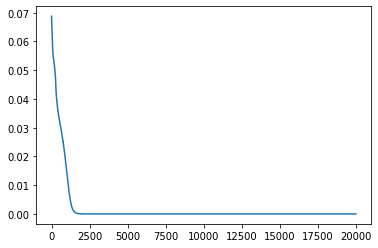

In [12]:
plt.plot(history.history['loss'], label='MAE (testing data)')

In [13]:
history.history['loss'][-1]

0.0

In [14]:
hist_ae.history['loss'][-1]

0.0

In [15]:
X = np.linspace(0., 1., 100)
Y = [autoencoder.predict(np.array([[x]]))[0,0] for x in X]
Y2 = [ae.predict(np.array([[x]]))[0,0] for x in X]

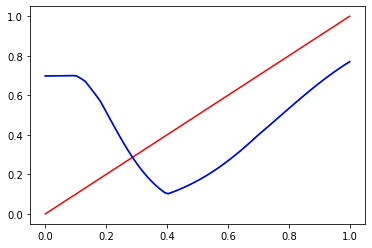

In [16]:
plt.plot(X, Y, X, X, 'r', X, Y2, 'b')

In [17]:
F = lambda x : autoencoder.predict(np.array([[x]]))[0,0]

In [18]:
init = 0.71
traj = []
N = 10000
x = init
for i in range(N):
    x = F(x)
    traj . append ( x )

In [19]:
init

0.71

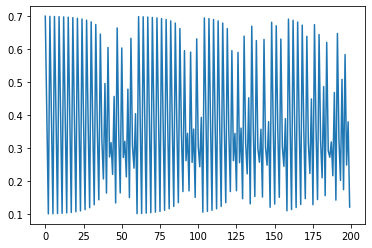

In [20]:
plt.plot([i for i in range(len(traj[-200:]))], traj[-200:])

In [21]:
len(set(traj[-200:]))

200

In [22]:
#traj[-50:]

In [23]:
init

0.71

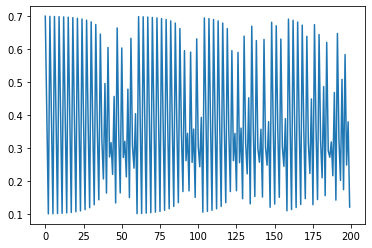

In [24]:
AE = lambda x : ae.predict(np.array([[x]]))[0,0]
ae_traj = []
x = init
for i in range(N):
    x = AE(x)
    ae_traj . append ( x )
plt.plot([i for i in range(len(ae_traj[-200:]))], ae_traj[-200:])

In [25]:
ae_traj == traj

True

In [26]:
# #Logistic Map Example
# X = np.linspace(0., 1., 100)
# G = lambda x : 4.0*x*(1.0-x)
# Y = [G(x) for x in X]
# plt.plot(X, Y, X, X, 'r')

In [27]:
# init, logistic_traj = 0.3, []
# N = 10000
# x = init
# for i in range(N):
#     x = G(x)
#     logistic_traj . append ( x )
# plt.plot([i for i in range(len(logistic_traj[-100:]))], logistic_traj[-100:])